In [1]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
tf.config.set_visible_devices([], 'GPU') # turning GPU use off as tensors exceed 10000*1000*50


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


getting our dataset, and model, and preparing for SHAP so that we can get it all to work


In [2]:
model = tf.keras.models.load_model("../CNN_Non_Dense")
df = pd.read_csv("../IMDB_with_predictions.csv", low_memory=False)[0:1000:1]
review = df.review
predictions = df.CNN_Predictions


tokenizer = Tokenizer()
tokenizer.fit_on_texts(review)
tokenized_reviews = tokenizer.texts_to_sequences(review)
padded_reviews = pad_sequences(tokenized_reviews, padding="post", maxlen=1000)

first_half_x, second_half_x, first_half_y, second_half_y = train_test_split(padded_reviews, predictions, train_size=0.25, shuffle=True, random_state=1000)

training our shap model

In [3]:
explainer = shap.Explainer(model.predict, first_half_x, max_evals=2001)
explainer.max_evals = 10000
first_half_explanations = explainer(first_half_x)
# second_half_explanations = explainer(second_half_x)

2745/2745 [==============================] - 8s 3ms/step


Permutation explainer:   0%|          | 1/250 [00:00<?, ?it/s]

1321/1321 [==============================] - 4s 3ms/step


Permutation explainer:   1%|          | 3/250 [00:23<21:32,  5.23s/it]

1578/1578 [==============================] - 5s 3ms/step


Permutation explainer:   2%|▏         | 4/250 [00:35<34:14,  8.35s/it]

1368/1368 [==============================] - 4s 3ms/step


Permutation explainer:   2%|▏         | 5/250 [00:46<37:45,  9.25s/it]

3097/3097 [==============================] - 9s 3ms/step


Permutation explainer:   2%|▏         | 6/250 [01:17<1:07:45, 16.66s/it]

1449/1449 [==============================] - 4s 3ms/step


Permutation explainer:   3%|▎         | 7/250 [01:28<1:00:13, 14.87s/it]

1442/1442 [==============================] - 4s 3ms/step


Permutation explainer:   3%|▎         | 8/250 [01:39<55:07, 13.67s/it]  

2849/2849 [==============================] - 8s 3ms/step


Permutation explainer:   4%|▎         | 9/250 [02:03<1:08:10, 16.97s/it]

1682/1682 [==============================] - 5s 3ms/step


Permutation explainer:   4%|▍         | 10/250 [02:16<1:02:54, 15.73s/it]

2002/2002 [==============================] - 6s 3ms/step


Permutation explainer:   4%|▍         | 11/250 [02:32<1:02:16, 15.63s/it]

1361/1361 [==============================] - 4s 3ms/step


Permutation explainer:   5%|▍         | 12/250 [02:42<55:39, 14.03s/it]  

1634/1634 [==============================] - 5s 3ms/step


Permutation explainer:   5%|▌         | 13/250 [02:55<53:43, 13.60s/it]

1294/1294 [==============================] - 4s 3ms/step


Permutation explainer:   6%|▌         | 14/250 [03:05<49:22, 12.55s/it]

2018/2018 [==============================] - 6s 3ms/step


Permutation explainer:   6%|▌         | 15/250 [03:21<53:00, 13.53s/it]

1298/1298 [==============================] - 4s 3ms/step


Permutation explainer:   6%|▋         | 16/250 [03:31<48:41, 12.49s/it]

1307/1307 [==============================] - 4s 3ms/step


Permutation explainer:   7%|▋         | 17/250 [03:41<45:51, 11.81s/it]

1479/1479 [==============================] - 5s 3ms/step


Permutation explainer:   7%|▋         | 18/250 [03:53<45:35, 11.79s/it]

1393/1393 [==============================] - 4s 3ms/step


Permutation explainer:   8%|▊         | 19/250 [04:04<44:52, 11.66s/it]

1286/1286 [==============================] - 4s 3ms/step


Permutation explainer:   8%|▊         | 20/250 [04:14<42:47, 11.16s/it]

2173/2173 [==============================] - 6s 3ms/step


Permutation explainer:   8%|▊         | 21/250 [04:31<49:36, 13.00s/it]

2133/2133 [==============================] - 6s 3ms/step


Permutation explainer:   9%|▉         | 22/250 [04:48<53:51, 14.17s/it]

1705/1705 [==============================] - 5s 3ms/step


Permutation explainer:   9%|▉         | 23/250 [05:02<53:04, 14.03s/it]

1309/1309 [==============================] - 4s 3ms/step


Permutation explainer:  10%|▉         | 24/250 [05:12<48:42, 12.93s/it]

1307/1307 [==============================] - 4s 3ms/step


Permutation explainer:  10%|█         | 25/250 [05:23<45:48, 12.21s/it]

2897/2897 [==============================] - 9s 3ms/step


Permutation explainer:  10%|█         | 26/250 [05:48<1:00:36, 16.24s/it]

1336/1336 [==============================] - 4s 3ms/step


Permutation explainer:  11%|█         | 27/250 [05:59<53:59, 14.53s/it]  

1370/1370 [==============================] - 4s 3ms/step


Permutation explainer:  11%|█         | 28/250 [06:10<49:30, 13.38s/it]

1367/1367 [==============================] - 4s 3ms/step


Permutation explainer:  12%|█▏        | 29/250 [06:20<46:21, 12.59s/it]

1353/1353 [==============================] - 4s 3ms/step


Permutation explainer:  12%|█▏        | 30/250 [06:31<43:50, 11.96s/it]

1367/1367 [==============================] - 4s 3ms/step


Permutation explainer:  12%|█▏        | 31/250 [06:41<42:00, 11.51s/it]

3053/3053 [==============================] - 9s 3ms/step


Permutation explainer:  13%|█▎        | 32/250 [07:09<59:40, 16.42s/it]

1930/1930 [==============================] - 6s 3ms/step


Permutation explainer:  13%|█▎        | 33/250 [07:24<57:59, 16.04s/it]

1331/1331 [==============================] - 4s 3ms/step


Permutation explainer:  14%|█▎        | 34/250 [07:35<51:38, 14.34s/it]

1386/1386 [==============================] - 4s 3ms/step


Permutation explainer:  14%|█▍        | 35/250 [07:45<47:14, 13.19s/it]

1380/1380 [==============================] - 4s 3ms/step


Permutation explainer:  14%|█▍        | 36/250 [07:56<44:43, 12.54s/it]

1327/1327 [==============================] - 4s 3ms/step


Permutation explainer:  15%|█▍        | 37/250 [08:07<42:29, 11.97s/it]

2277/2277 [==============================] - 7s 3ms/step


Permutation explainer:  15%|█▌        | 38/250 [08:26<49:13, 13.93s/it]

1487/1487 [==============================] - 5s 3ms/step


Permutation explainer:  16%|█▌        | 39/250 [08:37<46:55, 13.34s/it]

1927/1927 [==============================] - 6s 3ms/step


Permutation explainer:  16%|█▌        | 40/250 [08:53<48:52, 13.96s/it]

1435/1435 [==============================] - 4s 3ms/step


Permutation explainer:  16%|█▋        | 41/250 [09:04<46:04, 13.23s/it]

1369/1369 [==============================] - 4s 3ms/step


Permutation explainer:  17%|█▋        | 42/250 [09:15<43:22, 12.51s/it]

1374/1374 [==============================] - 4s 3ms/step


Permutation explainer:  17%|█▋        | 43/250 [09:26<41:30, 12.03s/it]

1342/1342 [==============================] - 4s 3ms/step


Permutation explainer:  18%|█▊        | 44/250 [09:37<40:01, 11.66s/it]

1331/1331 [==============================] - 4s 3ms/step


Permutation explainer:  18%|█▊        | 45/250 [09:48<38:52, 11.38s/it]

1308/1308 [==============================] - 4s 3ms/step


Permutation explainer:  18%|█▊        | 46/250 [09:58<37:51, 11.13s/it]

1333/1333 [==============================] - 4s 3ms/step


Permutation explainer:  19%|█▉        | 47/250 [10:09<37:02, 10.95s/it]

1331/1331 [==============================] - 4s 3ms/step


Permutation explainer:  19%|█▉        | 48/250 [10:19<36:17, 10.78s/it]

1321/1321 [==============================] - 4s 3ms/step


Permutation explainer:  20%|█▉        | 49/250 [10:29<35:36, 10.63s/it]

1403/1403 [==============================] - 4s 3ms/step


Permutation explainer:  20%|██        | 50/250 [10:40<35:48, 10.74s/it]

1341/1341 [==============================] - 4s 3ms/step


Permutation explainer:  20%|██        | 51/250 [10:51<35:33, 10.72s/it]

2714/2714 [==============================] - 8s 3ms/step


Permutation explainer:  21%|██        | 52/250 [11:13<46:49, 14.19s/it]

1301/1301 [==============================] - 4s 3ms/step


Permutation explainer:  21%|██        | 53/250 [11:23<42:23, 12.91s/it]

1381/1381 [==============================] - 4s 3ms/step


Permutation explainer:  22%|██▏       | 54/250 [11:34<39:56, 12.23s/it]

2406/2406 [==============================] - 7s 3ms/step


Permutation explainer:  22%|██▏       | 55/250 [11:52<45:47, 14.09s/it]

1360/1360 [==============================] - 4s 3ms/step


Permutation explainer:  22%|██▏       | 56/250 [12:02<41:41, 12.89s/it]

1354/1354 [==============================] - 4s 3ms/step


Permutation explainer:  23%|██▎       | 57/250 [12:13<38:53, 12.09s/it]

1423/1423 [==============================] - 4s 3ms/step


Permutation explainer:  23%|██▎       | 58/250 [12:23<37:19, 11.66s/it]

1434/1434 [==============================] - 4s 3ms/step


Permutation explainer:  24%|██▎       | 59/250 [12:35<36:38, 11.51s/it]

1362/1362 [==============================] - 4s 3ms/step


Permutation explainer:  24%|██▍       | 60/250 [12:45<35:35, 11.24s/it]

1486/1486 [==============================] - 4s 3ms/step


Permutation explainer:  24%|██▍       | 61/250 [12:57<35:40, 11.33s/it]

1453/1453 [==============================] - 4s 3ms/step


Permutation explainer:  25%|██▍       | 62/250 [13:08<35:23, 11.29s/it]

1316/1316 [==============================] - 4s 3ms/step


Permutation explainer:  25%|██▌       | 63/250 [13:18<33:56, 10.89s/it]

1308/1308 [==============================] - 4s 3ms/step


Permutation explainer:  26%|██▌       | 64/250 [13:28<33:05, 10.67s/it]

2038/2038 [==============================] - 6s 3ms/step


Permutation explainer:  26%|██▌       | 65/250 [13:44<37:56, 12.30s/it]

1434/1434 [==============================] - 4s 3ms/step


Permutation explainer:  26%|██▋       | 66/250 [13:55<36:34, 11.93s/it]

1557/1557 [==============================] - 5s 3ms/step


Permutation explainer:  27%|██▋       | 67/250 [14:07<36:09, 11.86s/it]

1323/1323 [==============================] - 4s 3ms/step


Permutation explainer:  27%|██▋       | 68/250 [14:17<34:37, 11.42s/it]

1352/1352 [==============================] - 4s 3ms/step


Permutation explainer:  28%|██▊       | 69/250 [14:27<33:23, 11.07s/it]

1398/1398 [==============================] - 4s 3ms/step


Permutation explainer:  28%|██▊       | 70/250 [14:38<32:58, 10.99s/it]

1701/1701 [==============================] - 5s 3ms/step


Permutation explainer:  28%|██▊       | 71/250 [14:52<35:04, 11.76s/it]

2609/2609 [==============================] - 8s 3ms/step


Permutation explainer:  29%|██▉       | 72/250 [15:14<44:08, 14.88s/it]

1348/1348 [==============================] - 4s 3ms/step


Permutation explainer:  29%|██▉       | 73/250 [15:25<40:22, 13.69s/it]

1355/1355 [==============================] - 4s 3ms/step


Permutation explainer:  30%|██▉       | 74/250 [15:36<37:46, 12.88s/it]

2967/2967 [==============================] - 9s 3ms/step


Permutation explainer:  30%|███       | 75/250 [16:03<50:07, 17.19s/it]

3068/3068 [==============================] - 9s 3ms/step


Permutation explainer:  30%|███       | 76/250 [16:32<1:00:21, 20.81s/it]

1409/1409 [==============================] - 4s 3ms/step


Permutation explainer:  31%|███       | 77/250 [16:44<51:57, 18.02s/it]  

2261/2261 [==============================] - 7s 3ms/step


Permutation explainer:  31%|███       | 78/250 [17:02<51:56, 18.12s/it]

1355/1355 [==============================] - 4s 3ms/step


Permutation explainer:  32%|███▏      | 79/250 [17:13<45:20, 15.91s/it]

2470/2470 [==============================] - 8s 3ms/step


Permutation explainer:  32%|███▏      | 80/250 [17:33<48:50, 17.24s/it]

1302/1302 [==============================] - 4s 3ms/step


Permutation explainer:  32%|███▏      | 81/250 [17:44<42:51, 15.21s/it]

1329/1329 [==============================] - 4s 3ms/step


Permutation explainer:  33%|███▎      | 82/250 [17:55<38:57, 13.91s/it]

1718/1718 [==============================] - 5s 3ms/step


Permutation explainer:  33%|███▎      | 83/250 [18:08<38:33, 13.86s/it]

1637/1637 [==============================] - 5s 3ms/step


Permutation explainer:  34%|███▎      | 84/250 [18:21<37:28, 13.55s/it]

1338/1338 [==============================] - 4s 3ms/step


Permutation explainer:  34%|███▍      | 85/250 [18:32<34:42, 12.62s/it]

1317/1317 [==============================] - 4s 3ms/step


Permutation explainer:  34%|███▍      | 86/250 [18:42<32:40, 11.95s/it]

1312/1312 [==============================] - 4s 3ms/step


Permutation explainer:  35%|███▍      | 87/250 [18:52<31:11, 11.48s/it]

1337/1337 [==============================] - 4s 3ms/step


Permutation explainer:  35%|███▌      | 88/250 [19:03<30:16, 11.22s/it]

1536/1536 [==============================] - 5s 3ms/step


Permutation explainer:  36%|███▌      | 89/250 [19:15<30:50, 11.49s/it]

1333/1333 [==============================] - 4s 3ms/step


Permutation explainer:  36%|███▌      | 90/250 [19:26<30:02, 11.26s/it]

2268/2268 [==============================] - 7s 3ms/step


Permutation explainer:  36%|███▋      | 91/250 [19:44<35:25, 13.37s/it]

1648/1648 [==============================] - 5s 3ms/step


Permutation explainer:  37%|███▋      | 92/250 [19:57<34:47, 13.21s/it]

1496/1496 [==============================] - 4s 3ms/step


Permutation explainer:  37%|███▋      | 93/250 [20:09<33:17, 12.72s/it]

1415/1415 [==============================] - 4s 3ms/step


Permutation explainer:  38%|███▊      | 94/250 [20:20<32:00, 12.31s/it]

2835/2835 [==============================] - 8s 3ms/step


Permutation explainer:  38%|███▊      | 95/250 [20:44<41:06, 15.91s/it]

2391/2391 [==============================] - 7s 3ms/step


Permutation explainer:  38%|███▊      | 96/250 [21:04<43:23, 16.91s/it]

1346/1346 [==============================] - 4s 3ms/step


Permutation explainer:  39%|███▉      | 97/250 [21:14<38:07, 14.95s/it]

1287/1287 [==============================] - 4s 3ms/step


Permutation explainer:  39%|███▉      | 98/250 [21:24<34:13, 13.51s/it]

1996/1996 [==============================] - 6s 3ms/step


Permutation explainer:  40%|███▉      | 99/250 [21:40<35:32, 14.12s/it]

1310/1310 [==============================] - 4s 3ms/step


Permutation explainer:  40%|████      | 100/250 [21:50<32:23, 12.95s/it]

1349/1349 [==============================] - 4s 3ms/step


Permutation explainer:  40%|████      | 101/250 [22:00<30:14, 12.18s/it]

1872/1872 [==============================] - 6s 3ms/step


Permutation explainer:  41%|████      | 102/250 [22:15<31:34, 12.80s/it]

1460/1460 [==============================] - 4s 3ms/step


Permutation explainer:  41%|████      | 103/250 [22:26<30:17, 12.37s/it]

1972/1972 [==============================] - 6s 3ms/step


Permutation explainer:  42%|████▏     | 104/250 [22:41<32:21, 13.30s/it]

1329/1329 [==============================] - 4s 3ms/step


Permutation explainer:  42%|████▏     | 105/250 [22:52<29:54, 12.38s/it]

1358/1358 [==============================] - 4s 3ms/step


Permutation explainer:  42%|████▏     | 106/250 [23:02<28:22, 11.82s/it]

1306/1306 [==============================] - 4s 3ms/step


Permutation explainer:  43%|████▎     | 107/250 [23:12<26:53, 11.28s/it]

1339/1339 [==============================] - 4s 3ms/step


Permutation explainer:  43%|████▎     | 108/250 [23:22<25:42, 10.86s/it]

2534/2534 [==============================] - 7s 3ms/step


Permutation explainer:  44%|████▎     | 109/250 [23:42<31:45, 13.51s/it]

1320/1320 [==============================] - 4s 3ms/step


Permutation explainer:  44%|████▍     | 110/250 [23:51<28:53, 12.39s/it]

1342/1342 [==============================] - 4s 3ms/step


Permutation explainer:  44%|████▍     | 111/250 [24:02<27:28, 11.86s/it]

1580/1580 [==============================] - 4s 3ms/step


Permutation explainer:  45%|████▍     | 112/250 [24:14<27:04, 11.77s/it]

1326/1326 [==============================] - 4s 3ms/step


Permutation explainer:  45%|████▌     | 113/250 [24:24<25:46, 11.29s/it]

1351/1351 [==============================] - 4s 3ms/step


Permutation explainer:  46%|████▌     | 114/250 [24:35<25:12, 11.12s/it]

2738/2738 [==============================] - 8s 3ms/step


Permutation explainer:  46%|████▌     | 115/250 [24:57<32:51, 14.60s/it]

1337/1337 [==============================] - 4s 3ms/step


Permutation explainer:  46%|████▋     | 116/250 [25:08<29:52, 13.37s/it]

1625/1625 [==============================] - 5s 3ms/step


Permutation explainer:  47%|████▋     | 117/250 [25:21<29:21, 13.24s/it]

2157/2157 [==============================] - 6s 3ms/step


Permutation explainer:  47%|████▋     | 118/250 [25:38<31:46, 14.44s/it]

2135/2135 [==============================] - 6s 3ms/step


Permutation explainer:  48%|████▊     | 119/250 [25:55<33:07, 15.18s/it]

3097/3097 [==============================] - 9s 3ms/step


Permutation explainer:  48%|████▊     | 120/250 [26:25<42:55, 19.81s/it]

1761/1761 [==============================] - 5s 3ms/step


Permutation explainer:  48%|████▊     | 121/250 [26:39<38:42, 18.00s/it]

1308/1308 [==============================] - 4s 3ms/step


Permutation explainer:  49%|████▉     | 122/250 [26:50<33:30, 15.71s/it]

1384/1384 [==============================] - 4s 3ms/step


Permutation explainer:  49%|████▉     | 123/250 [27:01<30:18, 14.32s/it]

1306/1306 [==============================] - 4s 3ms/step


Permutation explainer:  50%|████▉     | 124/250 [27:11<27:37, 13.15s/it]

1835/1835 [==============================] - 5s 3ms/step


Permutation explainer:  50%|█████     | 125/250 [27:26<28:17, 13.58s/it]

1499/1499 [==============================] - 5s 3ms/step


Permutation explainer:  50%|█████     | 126/250 [27:38<27:06, 13.12s/it]

1524/1524 [==============================] - 5s 3ms/step


Permutation explainer:  51%|█████     | 127/250 [27:50<26:14, 12.80s/it]

1458/1458 [==============================] - 4s 3ms/step


Permutation explainer:  51%|█████     | 128/250 [28:02<25:23, 12.48s/it]

1528/1528 [==============================] - 5s 3ms/step


Permutation explainer:  52%|█████▏    | 129/250 [28:14<25:00, 12.40s/it]

1396/1396 [==============================] - 4s 3ms/step


Permutation explainer:  52%|█████▏    | 130/250 [28:25<24:18, 12.15s/it]

1467/1467 [==============================] - 4s 3ms/step


Permutation explainer:  52%|█████▏    | 131/250 [28:37<23:51, 12.03s/it]

1402/1402 [==============================] - 4s 3ms/step


Permutation explainer:  53%|█████▎    | 132/250 [28:48<23:14, 11.81s/it]

1512/1512 [==============================] - 5s 3ms/step


Permutation explainer:  53%|█████▎    | 133/250 [29:01<23:24, 12.00s/it]

1654/1654 [==============================] - 5s 3ms/step


Permutation explainer:  54%|█████▎    | 134/250 [29:14<24:09, 12.49s/it]

1700/1700 [==============================] - 5s 3ms/step


Permutation explainer:  54%|█████▍    | 135/250 [29:28<24:27, 12.76s/it]

1293/1293 [==============================] - 4s 3ms/step


Permutation explainer:  54%|█████▍    | 136/250 [29:38<22:50, 12.02s/it]

2405/2405 [==============================] - 7s 3ms/step


Permutation explainer:  55%|█████▍    | 137/250 [29:58<27:00, 14.34s/it]

2220/2220 [==============================] - 7s 3ms/step


Permutation explainer:  55%|█████▌    | 138/250 [30:16<28:36, 15.32s/it]

1356/1356 [==============================] - 4s 3ms/step


Permutation explainer:  56%|█████▌    | 139/250 [30:26<25:51, 13.97s/it]

1838/1838 [==============================] - 5s 3ms/step


Permutation explainer:  56%|█████▌    | 140/250 [30:41<25:48, 14.07s/it]

2962/2962 [==============================] - 9s 3ms/step


Permutation explainer:  56%|█████▋    | 141/250 [31:07<32:16, 17.76s/it]

1346/1346 [==============================] - 4s 3ms/step


Permutation explainer:  57%|█████▋    | 142/250 [31:18<28:03, 15.59s/it]

1589/1589 [==============================] - 5s 3ms/step


Permutation explainer:  57%|█████▋    | 143/250 [31:30<26:05, 14.63s/it]

1330/1330 [==============================] - 4s 3ms/step


Permutation explainer:  58%|█████▊    | 144/250 [31:40<23:39, 13.39s/it]

1343/1343 [==============================] - 4s 3ms/step


Permutation explainer:  58%|█████▊    | 145/250 [31:51<21:56, 12.54s/it]

2937/2937 [==============================] - 9s 3ms/step


Permutation explainer:  58%|█████▊    | 146/250 [32:17<28:31, 16.45s/it]

2520/2520 [==============================] - 7s 3ms/step


Permutation explainer:  59%|█████▉    | 147/250 [32:36<30:00, 17.48s/it]

2099/2099 [==============================] - 6s 3ms/step


Permutation explainer:  59%|█████▉    | 148/250 [32:52<28:57, 17.03s/it]

1459/1459 [==============================] - 4s 3ms/step


Permutation explainer:  60%|█████▉    | 149/250 [33:04<25:40, 15.25s/it]

1355/1355 [==============================] - 4s 3ms/step


Permutation explainer:  60%|██████    | 150/250 [33:14<23:00, 13.81s/it]

1524/1524 [==============================] - 5s 3ms/step


Permutation explainer:  60%|██████    | 151/250 [33:26<21:51, 13.25s/it]

1304/1304 [==============================] - 4s 3ms/step


Permutation explainer:  61%|██████    | 152/250 [33:36<20:08, 12.33s/it]

1312/1312 [==============================] - 4s 3ms/step


Permutation explainer:  61%|██████    | 153/250 [33:46<18:52, 11.68s/it]

1318/1318 [==============================] - 4s 3ms/step


Permutation explainer:  62%|██████▏   | 154/250 [33:57<18:04, 11.29s/it]

1352/1352 [==============================] - 4s 3ms/step


Permutation explainer:  62%|██████▏   | 155/250 [34:07<17:24, 10.99s/it]

1286/1286 [==============================] - 4s 3ms/step


Permutation explainer:  62%|██████▏   | 156/250 [34:17<16:46, 10.71s/it]

1407/1407 [==============================] - 4s 3ms/step


Permutation explainer:  63%|██████▎   | 157/250 [34:28<16:52, 10.89s/it]

1565/1565 [==============================] - 5s 3ms/step


Permutation explainer:  63%|██████▎   | 158/250 [34:40<17:16, 11.27s/it]

1462/1462 [==============================] - 4s 3ms/step


Permutation explainer:  64%|██████▎   | 159/250 [34:52<17:09, 11.31s/it]

1375/1375 [==============================] - 4s 3ms/step


Permutation explainer:  64%|██████▍   | 160/250 [35:03<16:46, 11.18s/it]

1418/1418 [==============================] - 4s 3ms/step


Permutation explainer:  64%|██████▍   | 161/250 [35:14<16:40, 11.24s/it]

1969/1969 [==============================] - 6s 3ms/step


Permutation explainer:  65%|██████▍   | 162/250 [35:30<18:19, 12.50s/it]

1344/1344 [==============================] - 4s 3ms/step


Permutation explainer:  65%|██████▌   | 163/250 [35:40<17:21, 11.97s/it]

1668/1668 [==============================] - 5s 3ms/step


Permutation explainer:  66%|██████▌   | 164/250 [35:53<17:34, 12.27s/it]

1623/1623 [==============================] - 5s 3ms/step


Permutation explainer:  66%|██████▌   | 165/250 [36:06<17:27, 12.32s/it]

1400/1400 [==============================] - 4s 3ms/step


Permutation explainer:  66%|██████▋   | 166/250 [36:17<16:44, 11.95s/it]

2072/2072 [==============================] - 6s 3ms/step


Permutation explainer:  67%|██████▋   | 167/250 [36:33<18:22, 13.28s/it]

2830/2830 [==============================] - 8s 3ms/step


Permutation explainer:  67%|██████▋   | 168/250 [36:57<22:18, 16.32s/it]

1358/1358 [==============================] - 4s 3ms/step


Permutation explainer:  68%|██████▊   | 169/250 [37:07<19:37, 14.54s/it]

1466/1466 [==============================] - 4s 3ms/step


Permutation explainer:  68%|██████▊   | 170/250 [37:18<18:04, 13.55s/it]

1384/1384 [==============================] - 4s 3ms/step


Permutation explainer:  68%|██████▊   | 171/250 [37:29<16:38, 12.64s/it]

1328/1328 [==============================] - 4s 3ms/step


Permutation explainer:  69%|██████▉   | 172/250 [37:39<15:36, 12.01s/it]

2130/2130 [==============================] - 6s 3ms/step


Permutation explainer:  69%|██████▉   | 173/250 [37:56<17:11, 13.40s/it]

1702/1702 [==============================] - 5s 3ms/step


Permutation explainer:  70%|██████▉   | 174/250 [38:09<16:53, 13.33s/it]

1313/1313 [==============================] - 4s 3ms/step


Permutation explainer:  70%|███████   | 175/250 [38:19<15:26, 12.35s/it]

2535/2535 [==============================] - 7s 3ms/step


Permutation explainer:  70%|███████   | 176/250 [38:40<18:15, 14.81s/it]

1902/1902 [==============================] - 6s 3ms/step


Permutation explainer:  71%|███████   | 177/250 [38:54<17:55, 14.73s/it]

1329/1329 [==============================] - 4s 3ms/step


Permutation explainer:  71%|███████   | 178/250 [39:04<16:03, 13.38s/it]

1361/1361 [==============================] - 4s 3ms/step


Permutation explainer:  72%|███████▏  | 179/250 [39:15<14:51, 12.56s/it]

1781/1781 [==============================] - 5s 3ms/step


Permutation explainer:  72%|███████▏  | 180/250 [39:29<15:08, 12.97s/it]

1356/1356 [==============================] - 4s 3ms/step


Permutation explainer:  72%|███████▏  | 181/250 [39:40<14:05, 12.25s/it]

1949/1949 [==============================] - 6s 3ms/step


Permutation explainer:  73%|███████▎  | 182/250 [39:55<15:01, 13.26s/it]

2182/2182 [==============================] - 7s 3ms/step


Permutation explainer:  73%|███████▎  | 183/250 [40:13<16:15, 14.56s/it]

1550/1550 [==============================] - 5s 3ms/step


Permutation explainer:  74%|███████▎  | 184/250 [40:25<15:10, 13.80s/it]

1318/1318 [==============================] - 4s 3ms/step


Permutation explainer:  74%|███████▍  | 185/250 [40:35<13:41, 12.63s/it]

1346/1346 [==============================] - 4s 3ms/step


Permutation explainer:  74%|███████▍  | 186/250 [40:45<12:44, 11.95s/it]

1707/1707 [==============================] - 5s 3ms/step


Permutation explainer:  75%|███████▍  | 187/250 [40:58<12:53, 12.27s/it]

1324/1324 [==============================] - 4s 3ms/step


Permutation explainer:  75%|███████▌  | 188/250 [41:08<12:01, 11.63s/it]

2262/2262 [==============================] - 7s 3ms/step


Permutation explainer:  76%|███████▌  | 189/250 [41:26<13:46, 13.55s/it]

1757/1757 [==============================] - 5s 3ms/step


Permutation explainer:  76%|███████▌  | 190/250 [41:39<13:25, 13.42s/it]

1340/1340 [==============================] - 4s 3ms/step


Permutation explainer:  76%|███████▋  | 191/250 [41:50<12:13, 12.44s/it]

1388/1388 [==============================] - 4s 3ms/step


Permutation explainer:  77%|███████▋  | 192/250 [42:00<11:27, 11.86s/it]

2062/2062 [==============================] - 6s 3ms/step


Permutation explainer:  77%|███████▋  | 193/250 [42:16<12:20, 12.99s/it]

1555/1555 [==============================] - 5s 3ms/step


Permutation explainer:  78%|███████▊  | 194/250 [42:27<11:44, 12.58s/it]

1341/1341 [==============================] - 4s 3ms/step


Permutation explainer:  78%|███████▊  | 195/250 [42:38<10:52, 11.87s/it]

1647/1647 [==============================] - 5s 3ms/step


Permutation explainer:  78%|███████▊  | 196/250 [42:50<10:52, 12.08s/it]

1429/1429 [==============================] - 4s 3ms/step


Permutation explainer:  79%|███████▉  | 197/250 [43:01<10:21, 11.73s/it]

1364/1364 [==============================] - 4s 3ms/step


Permutation explainer:  79%|███████▉  | 198/250 [43:11<09:49, 11.34s/it]

1420/1420 [==============================] - 4s 3ms/step


Permutation explainer:  80%|███████▉  | 199/250 [43:22<09:28, 11.14s/it]

1933/1933 [==============================] - 6s 3ms/step


Permutation explainer:  80%|████████  | 200/250 [43:37<10:05, 12.10s/it]

1511/1511 [==============================] - 4s 3ms/step


Permutation explainer:  80%|████████  | 201/250 [43:48<09:41, 11.88s/it]

1350/1350 [==============================] - 4s 3ms/step


Permutation explainer:  81%|████████  | 202/250 [43:58<09:06, 11.38s/it]

1441/1441 [==============================] - 4s 3ms/step


Permutation explainer:  81%|████████  | 203/250 [44:09<08:51, 11.31s/it]

1325/1325 [==============================] - 4s 3ms/step


Permutation explainer:  82%|████████▏ | 204/250 [44:19<08:22, 10.91s/it]

1359/1359 [==============================] - 4s 3ms/step


Permutation explainer:  82%|████████▏ | 205/250 [44:30<08:04, 10.77s/it]

1406/1406 [==============================] - 4s 3ms/step


Permutation explainer:  82%|████████▏ | 206/250 [44:40<07:52, 10.74s/it]

1502/1502 [==============================] - 5s 3ms/step


Permutation explainer:  83%|████████▎ | 207/250 [44:52<07:52, 10.98s/it]

1867/1867 [==============================] - 6s 3ms/step


Permutation explainer:  83%|████████▎ | 208/250 [45:06<08:21, 11.94s/it]

1688/1688 [==============================] - 5s 3ms/step


Permutation explainer:  84%|████████▎ | 209/250 [45:19<08:18, 12.15s/it]

1880/1880 [==============================] - 6s 3ms/step


Permutation explainer:  84%|████████▍ | 210/250 [45:33<08:29, 12.73s/it]

1310/1310 [==============================] - 4s 3ms/step


Permutation explainer:  84%|████████▍ | 211/250 [45:43<07:44, 11.91s/it]

1701/1701 [==============================] - 5s 3ms/step


Permutation explainer:  85%|████████▍ | 212/250 [45:56<07:48, 12.34s/it]

1672/1672 [==============================] - 5s 3ms/step


Permutation explainer:  85%|████████▌ | 213/250 [46:09<07:41, 12.49s/it]

1310/1310 [==============================] - 4s 3ms/step


Permutation explainer:  86%|████████▌ | 214/250 [46:19<07:08, 11.92s/it]

1446/1446 [==============================] - 4s 3ms/step


Permutation explainer:  86%|████████▌ | 215/250 [46:31<06:51, 11.77s/it]

1386/1386 [==============================] - 4s 3ms/step


Permutation explainer:  86%|████████▋ | 216/250 [46:42<06:33, 11.57s/it]

1323/1323 [==============================] - 4s 3ms/step


Permutation explainer:  87%|████████▋ | 217/250 [46:53<06:14, 11.35s/it]

1348/1348 [==============================] - 4s 3ms/step


Permutation explainer:  87%|████████▋ | 218/250 [47:04<06:00, 11.27s/it]

1358/1358 [==============================] - 4s 3ms/step


Permutation explainer:  88%|████████▊ | 219/250 [47:15<05:47, 11.21s/it]

1437/1437 [==============================] - 5s 3ms/step


Permutation explainer:  88%|████████▊ | 220/250 [47:27<05:43, 11.45s/it]

1341/1341 [==============================] - 4s 3ms/step


Permutation explainer:  88%|████████▊ | 221/250 [47:38<05:23, 11.16s/it]

1304/1304 [==============================] - 4s 3ms/step


Permutation explainer:  89%|████████▉ | 222/250 [47:48<05:06, 10.94s/it]

1740/1740 [==============================] - 5s 3ms/step


Permutation explainer:  89%|████████▉ | 223/250 [48:02<05:21, 11.89s/it]

1296/1296 [==============================] - 4s 3ms/step


Permutation explainer:  90%|████████▉ | 224/250 [48:13<05:00, 11.54s/it]

1841/1841 [==============================] - 6s 3ms/step


Permutation explainer:  90%|█████████ | 225/250 [48:28<05:14, 12.56s/it]

1524/1524 [==============================] - 5s 3ms/step


Permutation explainer:  90%|█████████ | 226/250 [48:40<04:59, 12.46s/it]

1296/1296 [==============================] - 4s 3ms/step


Permutation explainer:  91%|█████████ | 227/250 [48:50<04:33, 11.88s/it]

2744/2744 [==============================] - 9s 3ms/step


Permutation explainer:  91%|█████████ | 228/250 [49:16<05:52, 16.02s/it]

1363/1363 [==============================] - 4s 3ms/step


Permutation explainer:  92%|█████████▏| 229/250 [49:27<05:05, 14.54s/it]

2168/2168 [==============================] - 7s 3ms/step


Permutation explainer:  92%|█████████▏| 230/250 [49:45<05:09, 15.49s/it]

1694/1694 [==============================] - 5s 3ms/step


Permutation explainer:  92%|█████████▏| 231/250 [49:59<04:43, 14.94s/it]

1569/1569 [==============================] - 5s 3ms/step


Permutation explainer:  93%|█████████▎| 232/250 [50:11<04:15, 14.18s/it]

1448/1448 [==============================] - 4s 3ms/step


Permutation explainer:  93%|█████████▎| 233/250 [50:23<03:47, 13.41s/it]

1438/1438 [==============================] - 4s 3ms/step


Permutation explainer:  94%|█████████▎| 234/250 [50:34<03:25, 12.83s/it]

1362/1362 [==============================] - 4s 3ms/step


Permutation explainer:  94%|█████████▍| 235/250 [50:45<03:03, 12.21s/it]

1412/1412 [==============================] - 4s 3ms/step


Permutation explainer:  94%|█████████▍| 236/250 [50:56<02:47, 11.93s/it]

1358/1358 [==============================] - 4s 3ms/step


Permutation explainer:  95%|█████████▍| 237/250 [51:07<02:30, 11.57s/it]

1767/1767 [==============================] - 5s 3ms/step


Permutation explainer:  95%|█████████▌| 238/250 [51:21<02:28, 12.38s/it]

2109/2109 [==============================] - 6s 3ms/step


Permutation explainer:  96%|█████████▌| 239/250 [51:38<02:31, 13.75s/it]

2157/2157 [==============================] - 7s 3ms/step


Permutation explainer:  96%|█████████▌| 240/250 [51:55<02:28, 14.81s/it]

1306/1306 [==============================] - 4s 3ms/step


Permutation explainer:  96%|█████████▋| 241/250 [52:06<02:01, 13.51s/it]

1415/1415 [==============================] - 4s 3ms/step


Permutation explainer:  97%|█████████▋| 242/250 [52:17<01:42, 12.77s/it]

1441/1441 [==============================] - 4s 3ms/step


Permutation explainer:  97%|█████████▋| 243/250 [52:28<01:26, 12.34s/it]

1337/1337 [==============================] - 4s 3ms/step


Permutation explainer:  98%|█████████▊| 244/250 [52:39<01:10, 11.80s/it]

1358/1358 [==============================] - 4s 3ms/step


Permutation explainer:  98%|█████████▊| 245/250 [52:50<00:57, 11.48s/it]

1691/1691 [==============================] - 5s 3ms/step


Permutation explainer:  98%|█████████▊| 246/250 [53:03<00:48, 12.05s/it]

1580/1580 [==============================] - 5s 3ms/step


Permutation explainer:  99%|█████████▉| 247/250 [53:15<00:36, 12.13s/it]

1463/1463 [==============================] - 4s 3ms/step


Permutation explainer:  99%|█████████▉| 248/250 [53:27<00:24, 12.01s/it]

1741/1741 [==============================] - 5s 3ms/step


Permutation explainer: 100%|█████████▉| 249/250 [53:41<00:12, 12.53s/it]

1715/1715 [==============================] - 5s 3ms/step


Permutation explainer: 100%|██████████| 250/250 [53:54<00:00, 12.76s/it]

2465/2465 [==============================] - 7s 3ms/step


Permutation explainer: 251it [54:14, 13.02s/it]                         


In [5]:
print(first_half_explanations.values[0])

[-2.82136891e-04  3.87244452e-03  5.48900415e-03 -4.22506238e-02
 -4.57903898e-02  4.56630787e-03  4.24196937e-04  1.92770011e-03
  5.02726462e-03 -1.41382896e-03 -8.62635129e-04  4.59052692e-04
 -9.83984623e-03  5.47752920e-03 -6.38972702e-04  7.55171406e-03
 -2.81454280e-03  8.51019817e-03 -4.98076020e-03  1.03137956e-02
 -4.06774069e-03 -1.53722540e-03  6.14281374e-03 -1.31314354e-03
 -2.29338758e-03 -1.91805516e-03 -2.98596401e-03  1.02368218e-02
 -2.50985333e-03  4.27482578e-05  2.96933658e-04  2.19968214e-03
 -4.64245545e-03  6.06753842e-04  4.38938628e-03 -4.69280763e-03
  3.81334174e-03  9.04525248e-04 -6.23392044e-04 -1.56190103e-03
 -4.98590072e-03  3.44407625e-02 -5.91580448e-02  1.61769595e-03
  7.19257929e-04  3.12998595e-03 -6.37723758e-03 -4.57615658e-03
  2.55088756e-03  3.03723256e-03  2.19477614e-03 -5.30771017e-04
 -1.10208017e-04 -3.98989348e-05 -6.88809231e-04 -1.47904528e-03
  7.28029698e-04 -4.48895816e-03 -2.04426274e-03  8.75360431e-04
 -1.20582799e-02  1.94114

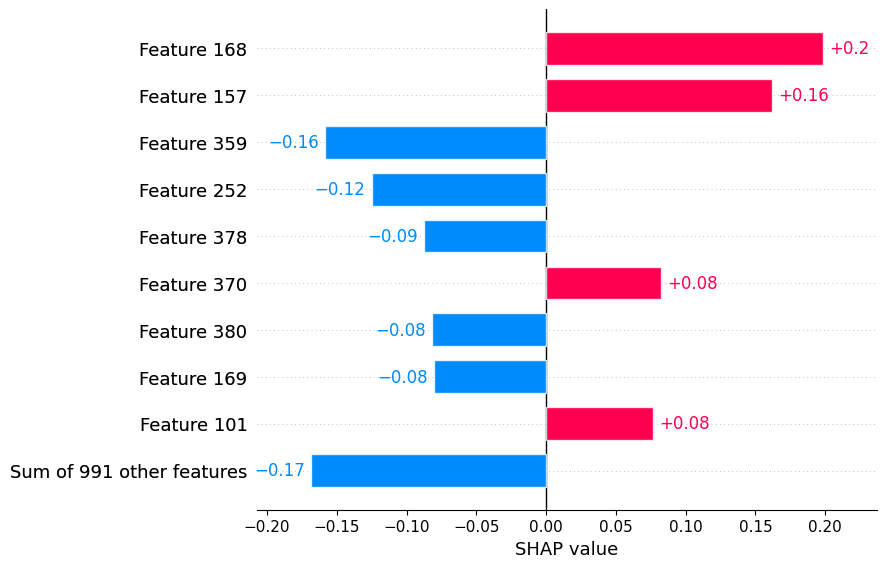

main


In [15]:
first_explanations = first_half_explanations[0]
shap.plots.bar(first_explanations)
print(review[0].split(" ")[167])